In [ ]:
# Importation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
drive.mount('/content/drive')

# Identifier les chemins dans Drive
train_path = '/content/drive/MyDrive/Projet act 208/train_8.csv'  # Replace with the actual path
test_path = '/content/drive/MyDrive/Projet act 208/test.csv'    # Replace with the actual path


# De CSV à Pandas Dataframes
train_df = pd.read_csv(train_path,sep=";")
test_df = pd.read_csv(test_path,sep=",")


Mounted at /content/drive


In [ ]:
# Overview sur les données
display(train_df)

,id,genre,age,permisConduire,codeRegion,dejaAssure,ageVehicule,accidentVehicule,primeAnnuelle,canalDistribution,tempsAssure,interesse
0,1,Male,74,1,29,0,1-2 Year,Yes,36008,124,166,0
1,2,Female,44,1,39,0,1-2 Year,Yes,2630,156,124,0
2,3,Female,50,1,39,1,1-2 Year,No,2630,127,80,0
3,4,Female,31,1,28,1,1-2 Year,No,44937,124,120,0
4,5,Male,44,1,50,0,1-2 Year,Yes,35309,8,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Male,55,0,45,0,1-2 Year,Yes,25913,3,256,0
49996,49997,Female,40,1,28,0,1-2 Year,Yes,40058,26,207,1
49997,49998,Male,61,1,0,0,1-2 Year,Yes,2630,124,223,1
49998,49999,Male,34,0,24,0,1-2 Year,Yes,2630,156,22,0


In [ ]:
train_df = train_df.drop(['id'], axis=1)
#test_df = test_df.drop(['id'], axis=1)


In [ ]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genre              50000 non-null  object
 1   age                50000 non-null  int64 
 2   permisConduire     50000 non-null  int64 
 3   codeRegion         50000 non-null  int64 
 4   dejaAssure         50000 non-null  int64 
 5   ageVehicule        50000 non-null  object
 6   accidentVehicule   50000 non-null  object
 7   primeAnnuelle      50000 non-null  int64 
 8   canalDistribution  50000 non-null  int64 
 9   tempsAssure        50000 non-null  int64 
 10  interesse          50000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.2+ MB


In [ ]:
# Détection des valeurs nulles
train_df.isnull().sum()

,0
genre,0
age,0
permisConduire,0
codeRegion,0
dejaAssure,0
ageVehicule,0
accidentVehicule,0
primeAnnuelle,0
canalDistribution,0
tempsAssure,0


In [ ]:
# Récupération de la liste des variables
Columns = train_df.columns
Columns

Index(['genre', 'age', 'permisConduire', 'codeRegion', 'dejaAssure',
       'ageVehicule', 'accidentVehicule', 'primeAnnuelle', 'canalDistribution',
       'tempsAssure', 'interesse'],
      dtype='object')

In [ ]:
#variables qualitatives
Columns_cat=['genre','permisConduire','dejaAssure','ageVehicule','accidentVehicule','interesse','canalDistribution','codeRegion']
for col in Columns_cat:
    print(col)
    print(f'{train_df[col].unique()}')

genre
['Male' 'Female']
permisConduire
[1 0]
dejaAssure
[0 1]
ageVehicule
['1-2 Year' '< 1 Year' '> 2 Years']
accidentVehicule
['Yes' 'No']
interesse
[0 1]
canalDistribution
[124 156 127   8  26 152 122 154 160 155 163 139  31  30  14 157  52 125
   3 158  10  13  60 159  15 151 150  55  19  65  11  12  35   7  61 153
  16  37  25  90 128  20 121 135 116 113  69  64   4   1  42 140 136 132
  29  24  53 110  21   9  92  23  44  59  18 120 109  91  54 111 131 101
  49  66  45 145  56 103  32 147  22 133  46  47 107 100  63  33 130  57
 148  81 118 106  94  36 138  88  78 119 146  87  89 129  50  38  86  62
  51 143 108  80  99  48 126  96  73  97 114  93  58  17  98  68]
codeRegion
[29 39 28 50  8 37 46  6 26 41 36 33 32 12 35  3  9 48 43  2 30 22 34 13
 27 47 16 10 25 18 38 15  4 23 11 31  1 21 51 45 40  7 14 24 17  0 49 42
 20 19 44  5 52]


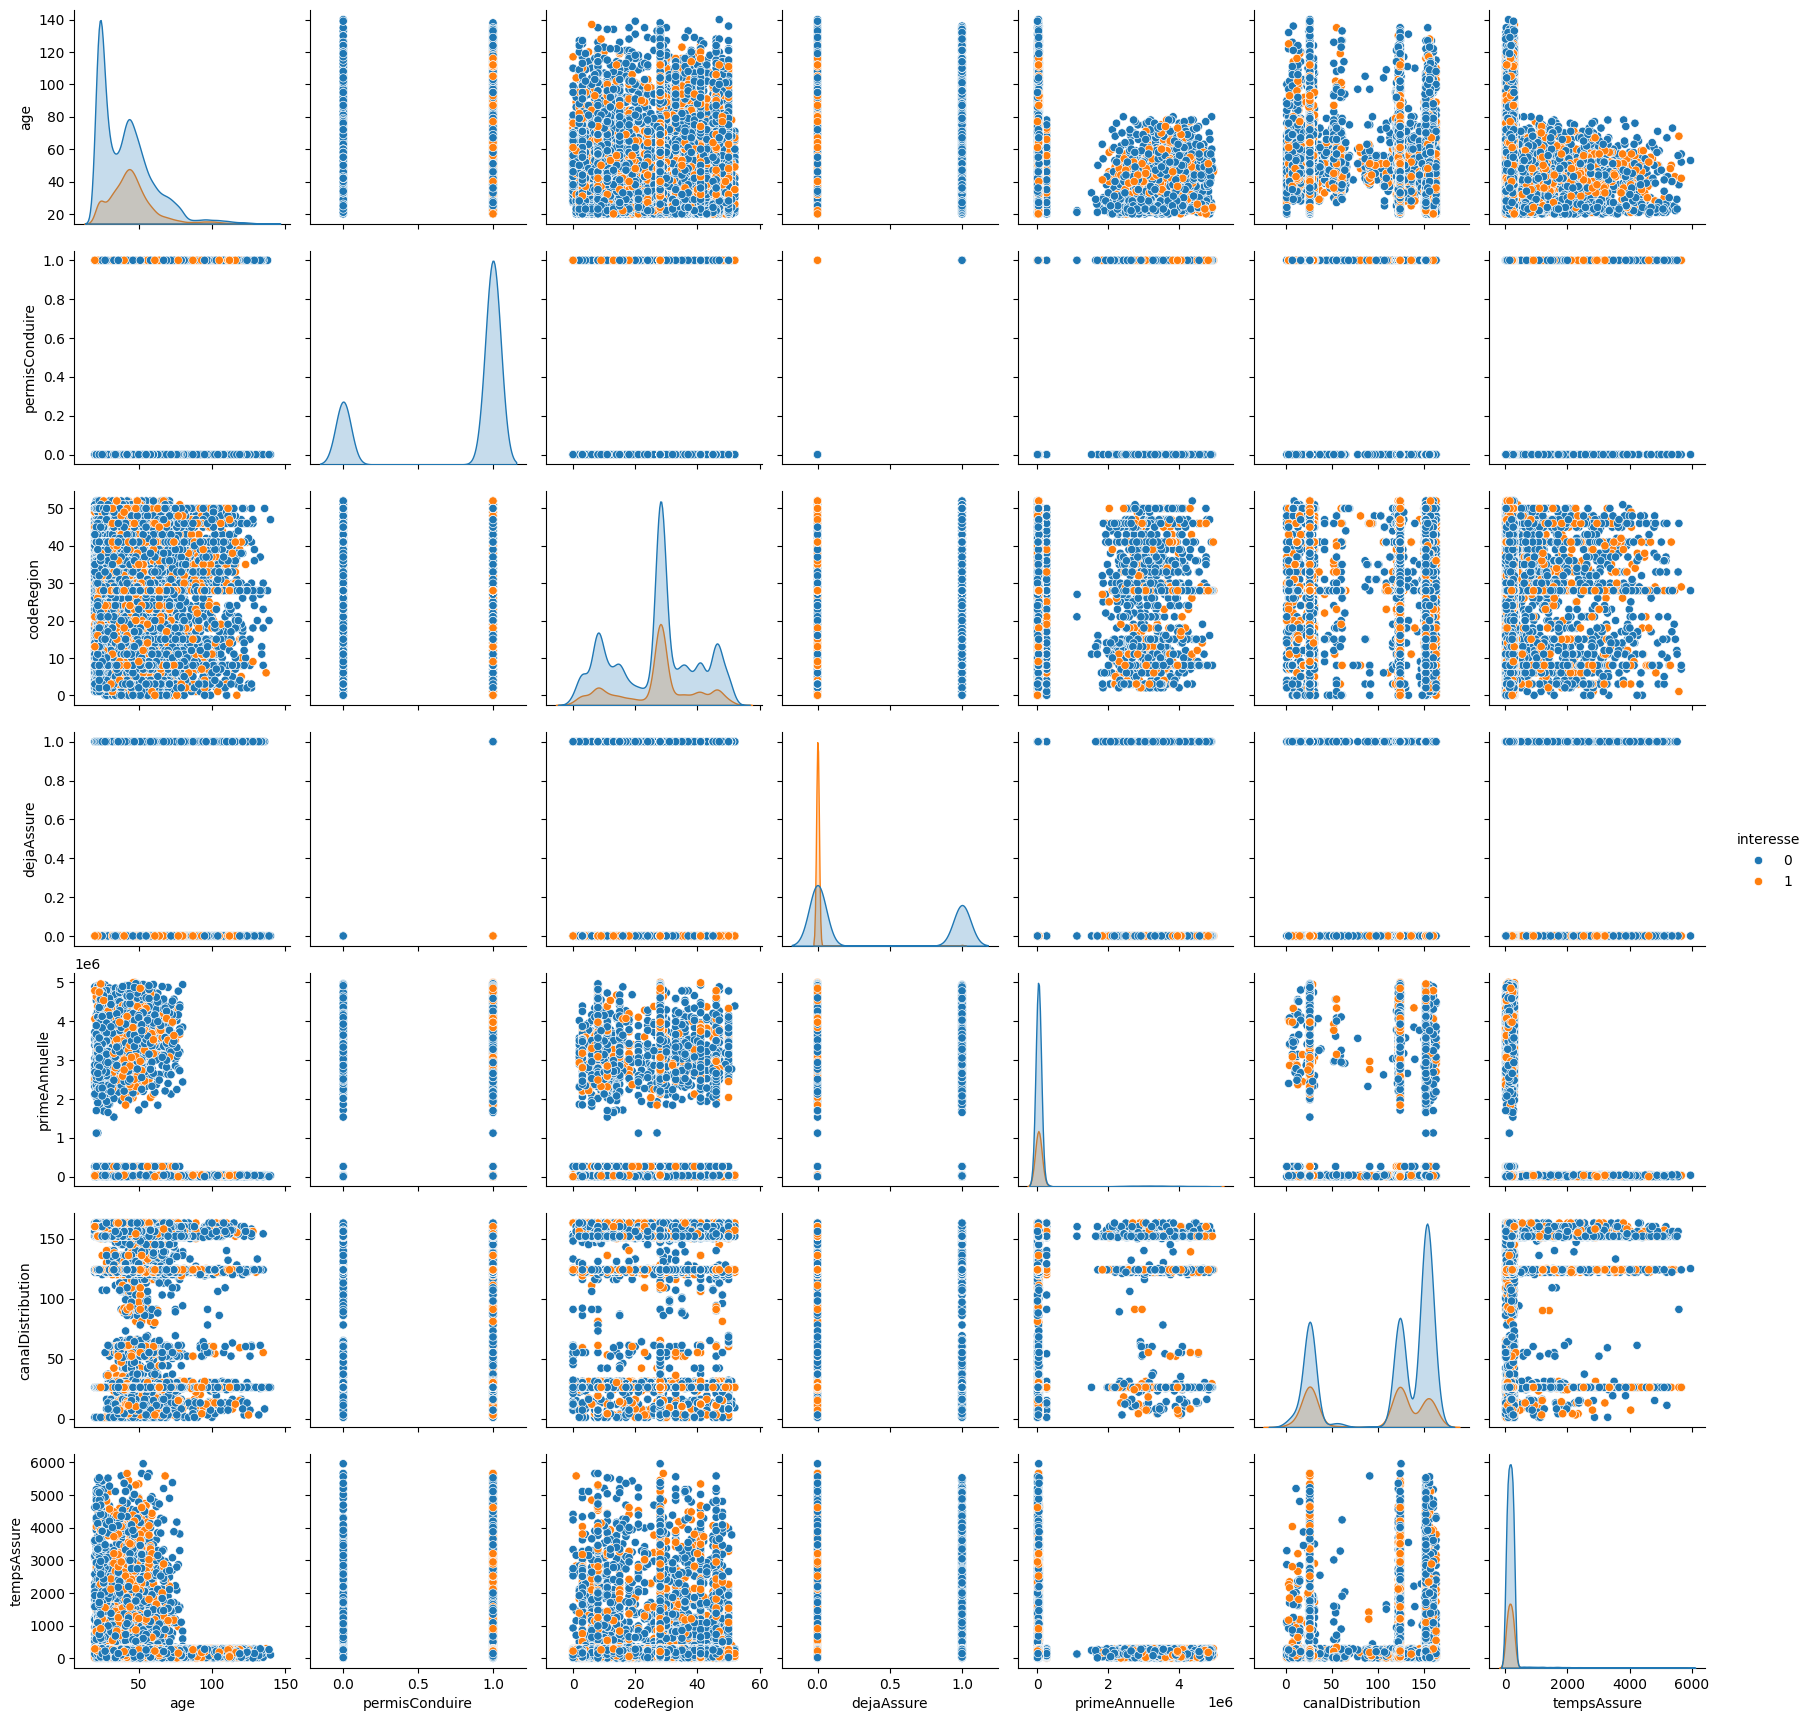

In [ ]:
sns.pairplot(train_df,hue='interesse')

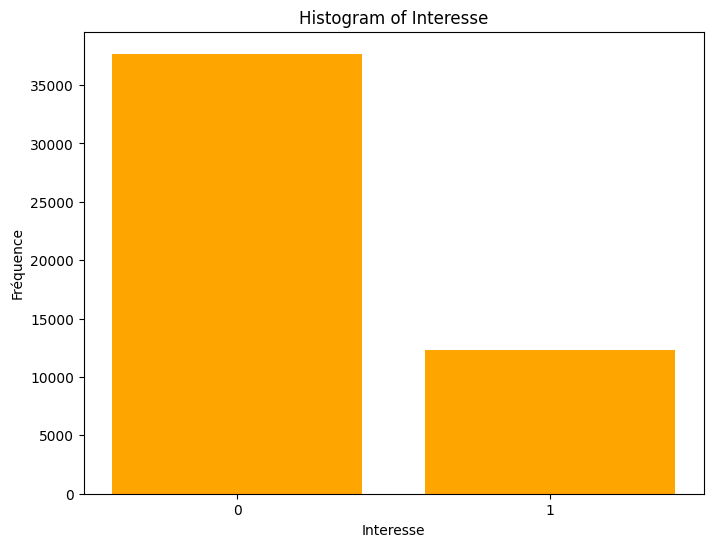

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(train_df['interesse'],color='orange', bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Interesse')
plt.ylabel('Fréquence')
plt.title('Histogram of Interesse')
plt.show()

In [ ]:
#Pourcentage des intéressés et non intéressés
not_interested =train_df[train_df['interesse']==0].shape[0]
interested =train_df[train_df['interesse']==1].shape[0]

print((not_interested  / (not_interested +interested))*100,"% des assurés ne sont pas intéressés ")
print((interested / (not_interested +interested))*100,"% des assurés sont intéressés ")

75.37 % des assurés ne sont pas intéressés 
24.63 % des assurés sont intéressés 


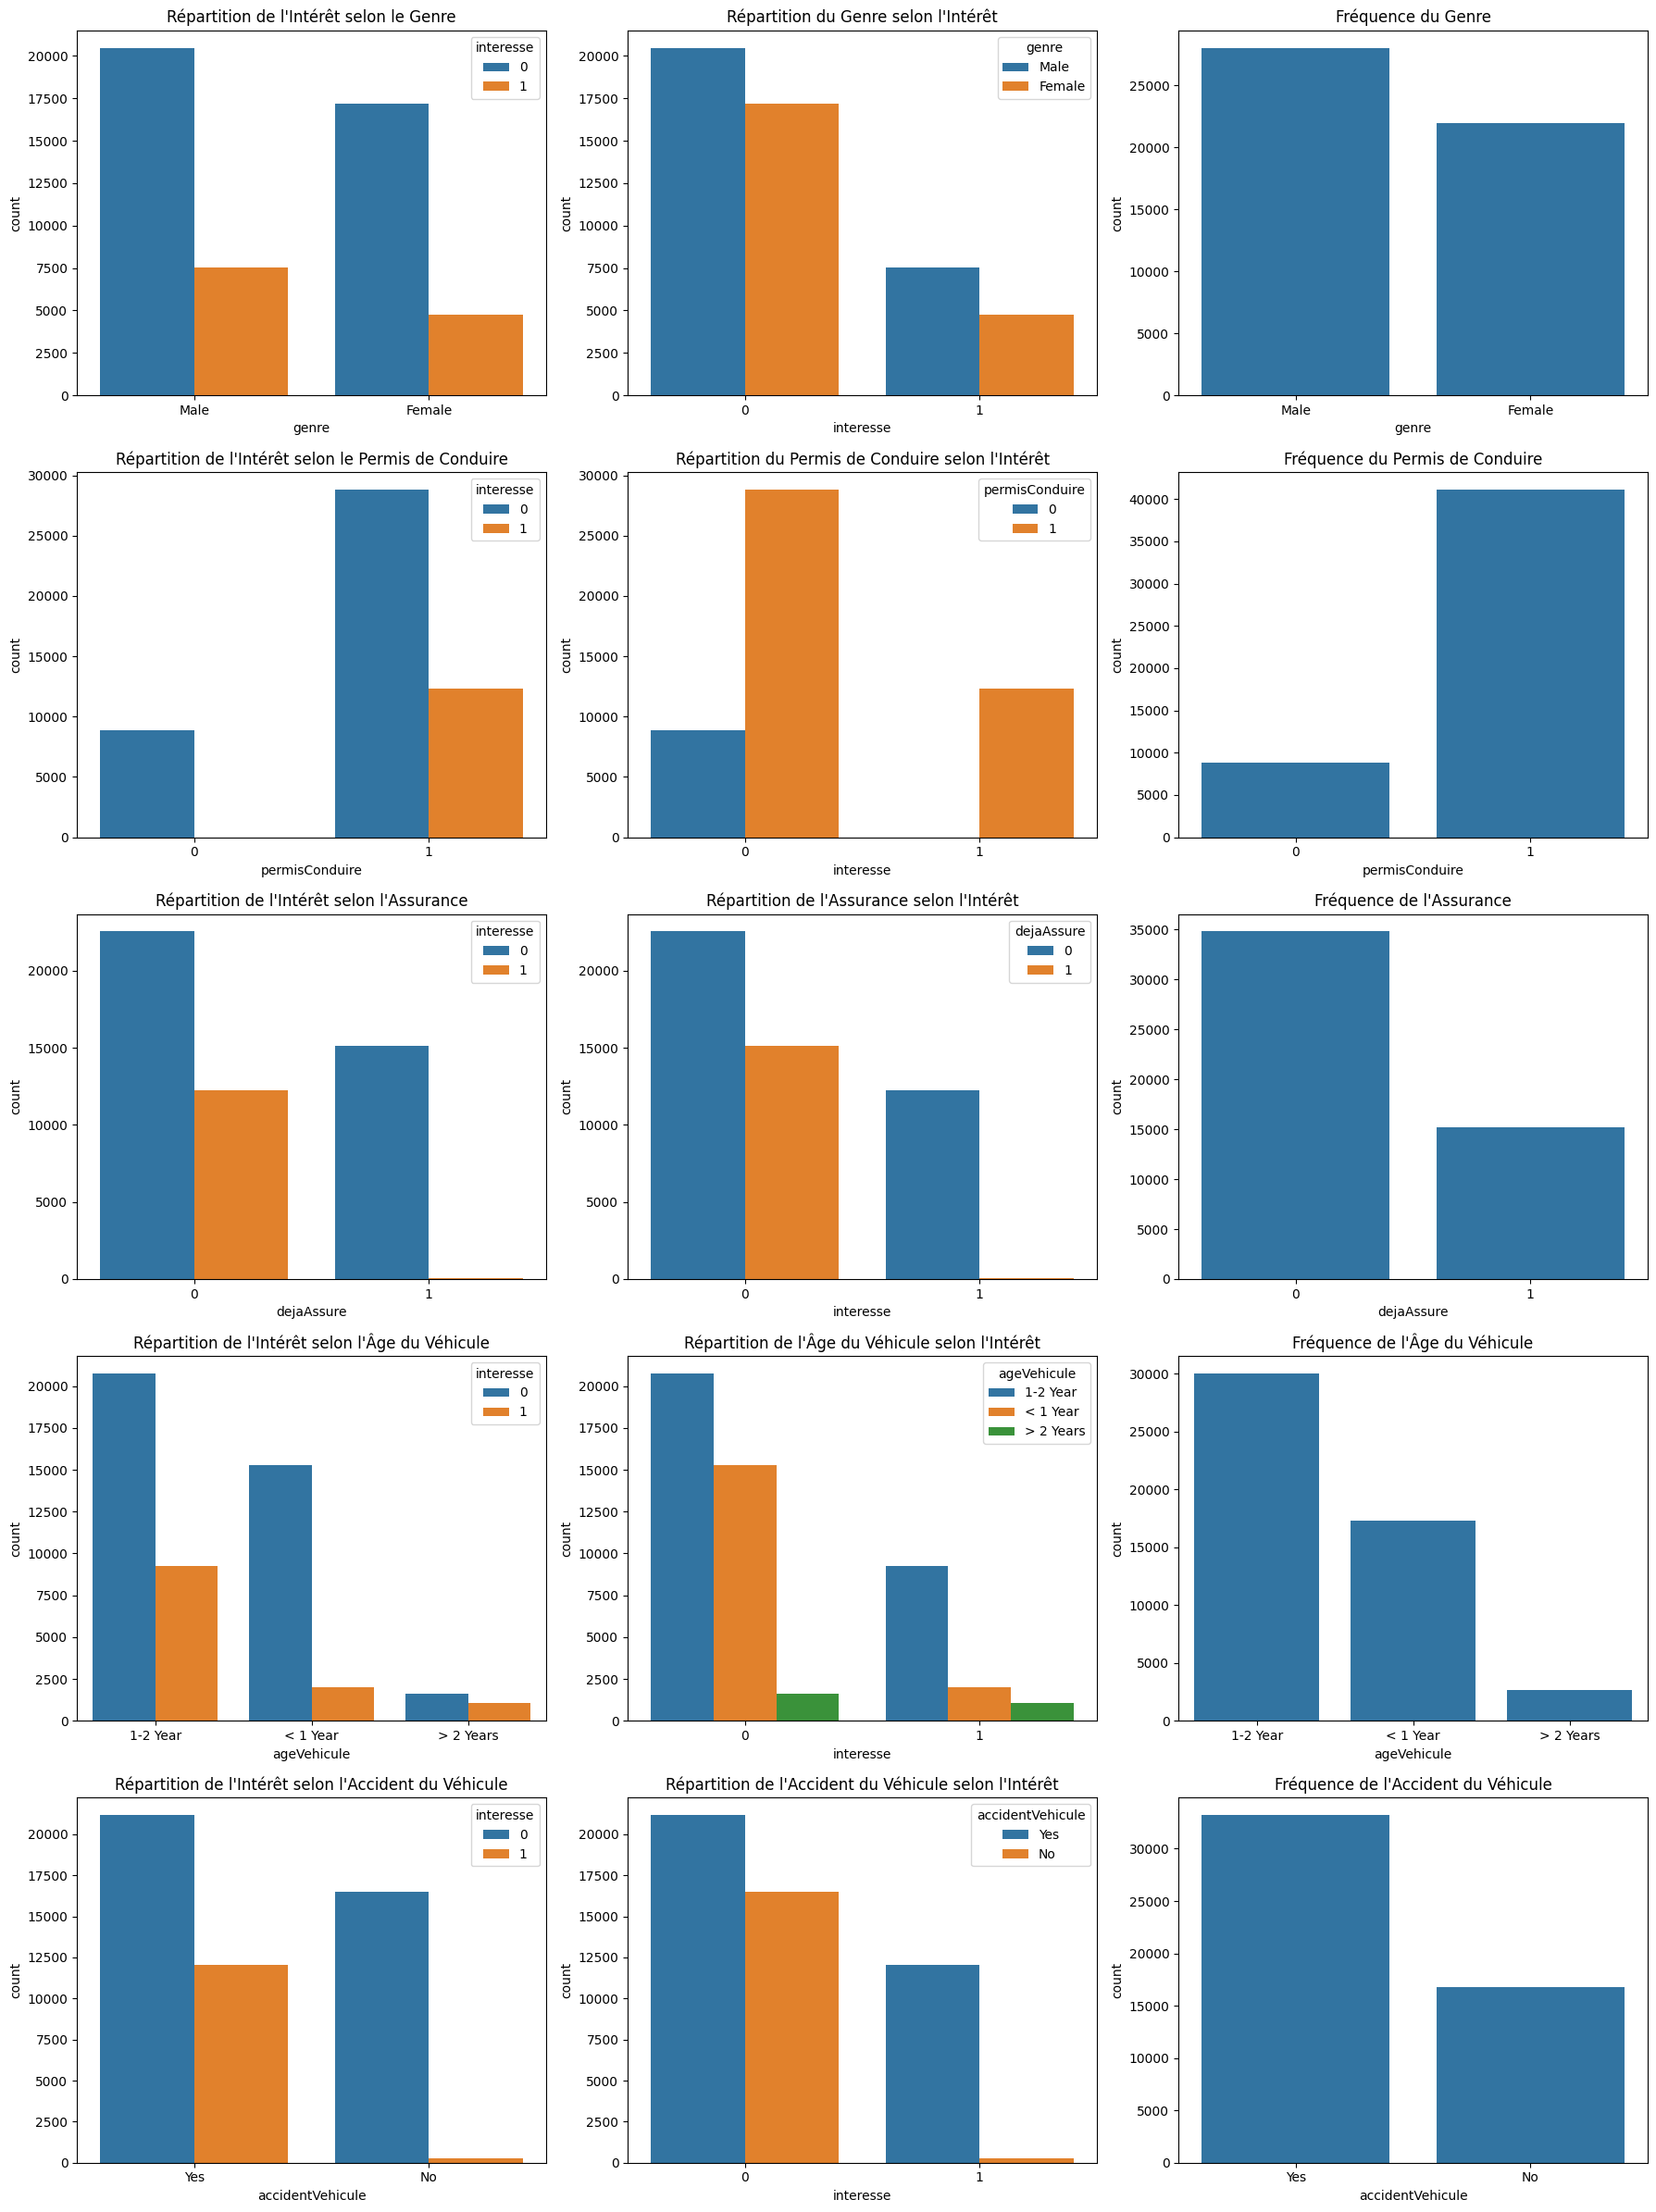

In [ ]:
plt.figure(figsize=(18, 24))

# Sous-graphe 1 : Genre
plt.subplot(5, 3, 1)
sns.countplot(data=train_df, x='genre', hue='interesse')
plt.title("Répartition de l'Intérêt selon le Genre")

plt.subplot(5, 3, 2)
sns.countplot(data=train_df, x='interesse', hue='genre')
plt.title("Répartition du Genre selon l'Intérêt")

plt.subplot(5, 3, 3)
sns.countplot(data=train_df, x='genre')
plt.title("Fréquence du Genre")

# Sous-graphe 2 : Permis de conduire
plt.subplot(5, 3, 4)
sns.countplot(data=train_df, x='permisConduire', hue='interesse')
plt.title("Répartition de l'Intérêt selon le Permis de Conduire")

plt.subplot(5, 3, 5)
sns.countplot(data=train_df, x='interesse', hue='permisConduire')
plt.title("Répartition du Permis de Conduire selon l'Intérêt")

plt.subplot(5, 3, 6)
sns.countplot(data=train_df, x='permisConduire')
plt.title("Fréquence du Permis de Conduire")

# Sous-graphe 3 : Assurance
plt.subplot(5, 3, 7)
sns.countplot(data=train_df, x='dejaAssure', hue='interesse')
plt.title("Répartition de l'Intérêt selon l'Assurance")

plt.subplot(5, 3, 8)
sns.countplot(data=train_df, x='interesse', hue='dejaAssure')
plt.title("Répartition de l'Assurance selon l'Intérêt")

plt.subplot(5, 3, 9)
sns.countplot(data=train_df, x='dejaAssure')
plt.title("Fréquence de l'Assurance")

# Sous-graphe 4 : Âge du véhicule
plt.subplot(5, 3, 10)
sns.countplot(data=train_df, x='ageVehicule', hue='interesse')
plt.title("Répartition de l'Intérêt selon l'Âge du Véhicule")

plt.subplot(5, 3, 11)
sns.countplot(data=train_df, x='interesse', hue='ageVehicule')
plt.title("Répartition de l'Âge du Véhicule selon l'Intérêt")

plt.subplot(5, 3, 12)
sns.countplot(data=train_df, x='ageVehicule')
plt.title("Fréquence de l'Âge du Véhicule")

# Sous-graphe 5 : Accident du véhicule
plt.subplot(5, 3, 13)
sns.countplot(data=train_df, x='accidentVehicule', hue='interesse')
plt.title("Répartition de l'Intérêt selon l'Accident du Véhicule")

plt.subplot(5, 3, 14)
sns.countplot(data=train_df, x='interesse', hue='accidentVehicule')
plt.title("Répartition de l'Accident du Véhicule selon l'Intérêt")

plt.subplot(5, 3, 15)
sns.countplot(data=train_df, x='accidentVehicule')
plt.title("Fréquence de l'Accident du Véhicule")

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les graphes
plt.show()


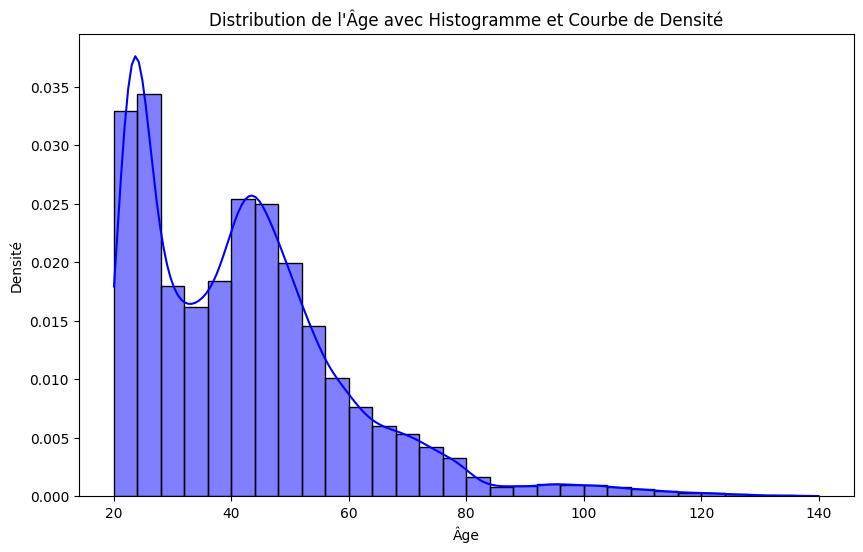

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Tracer l'histogramme et la courbe de densité pour la distribution de l'âge
sns.histplot(data=train_df, x='age', kde=True, color='blue', bins=30, stat='density')  # bins=30 pour ajuster le nombre de barres
plt.title("Distribution de l'Âge avec Histogramme et Courbe de Densité")
plt.xlabel("Âge")
plt.ylabel("Densité")

# Afficher le graphique
plt.show()



<ipython-input-13-fa1b0e36148b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y='canalDistribution', palette='coolwarm', edgecolor='black')


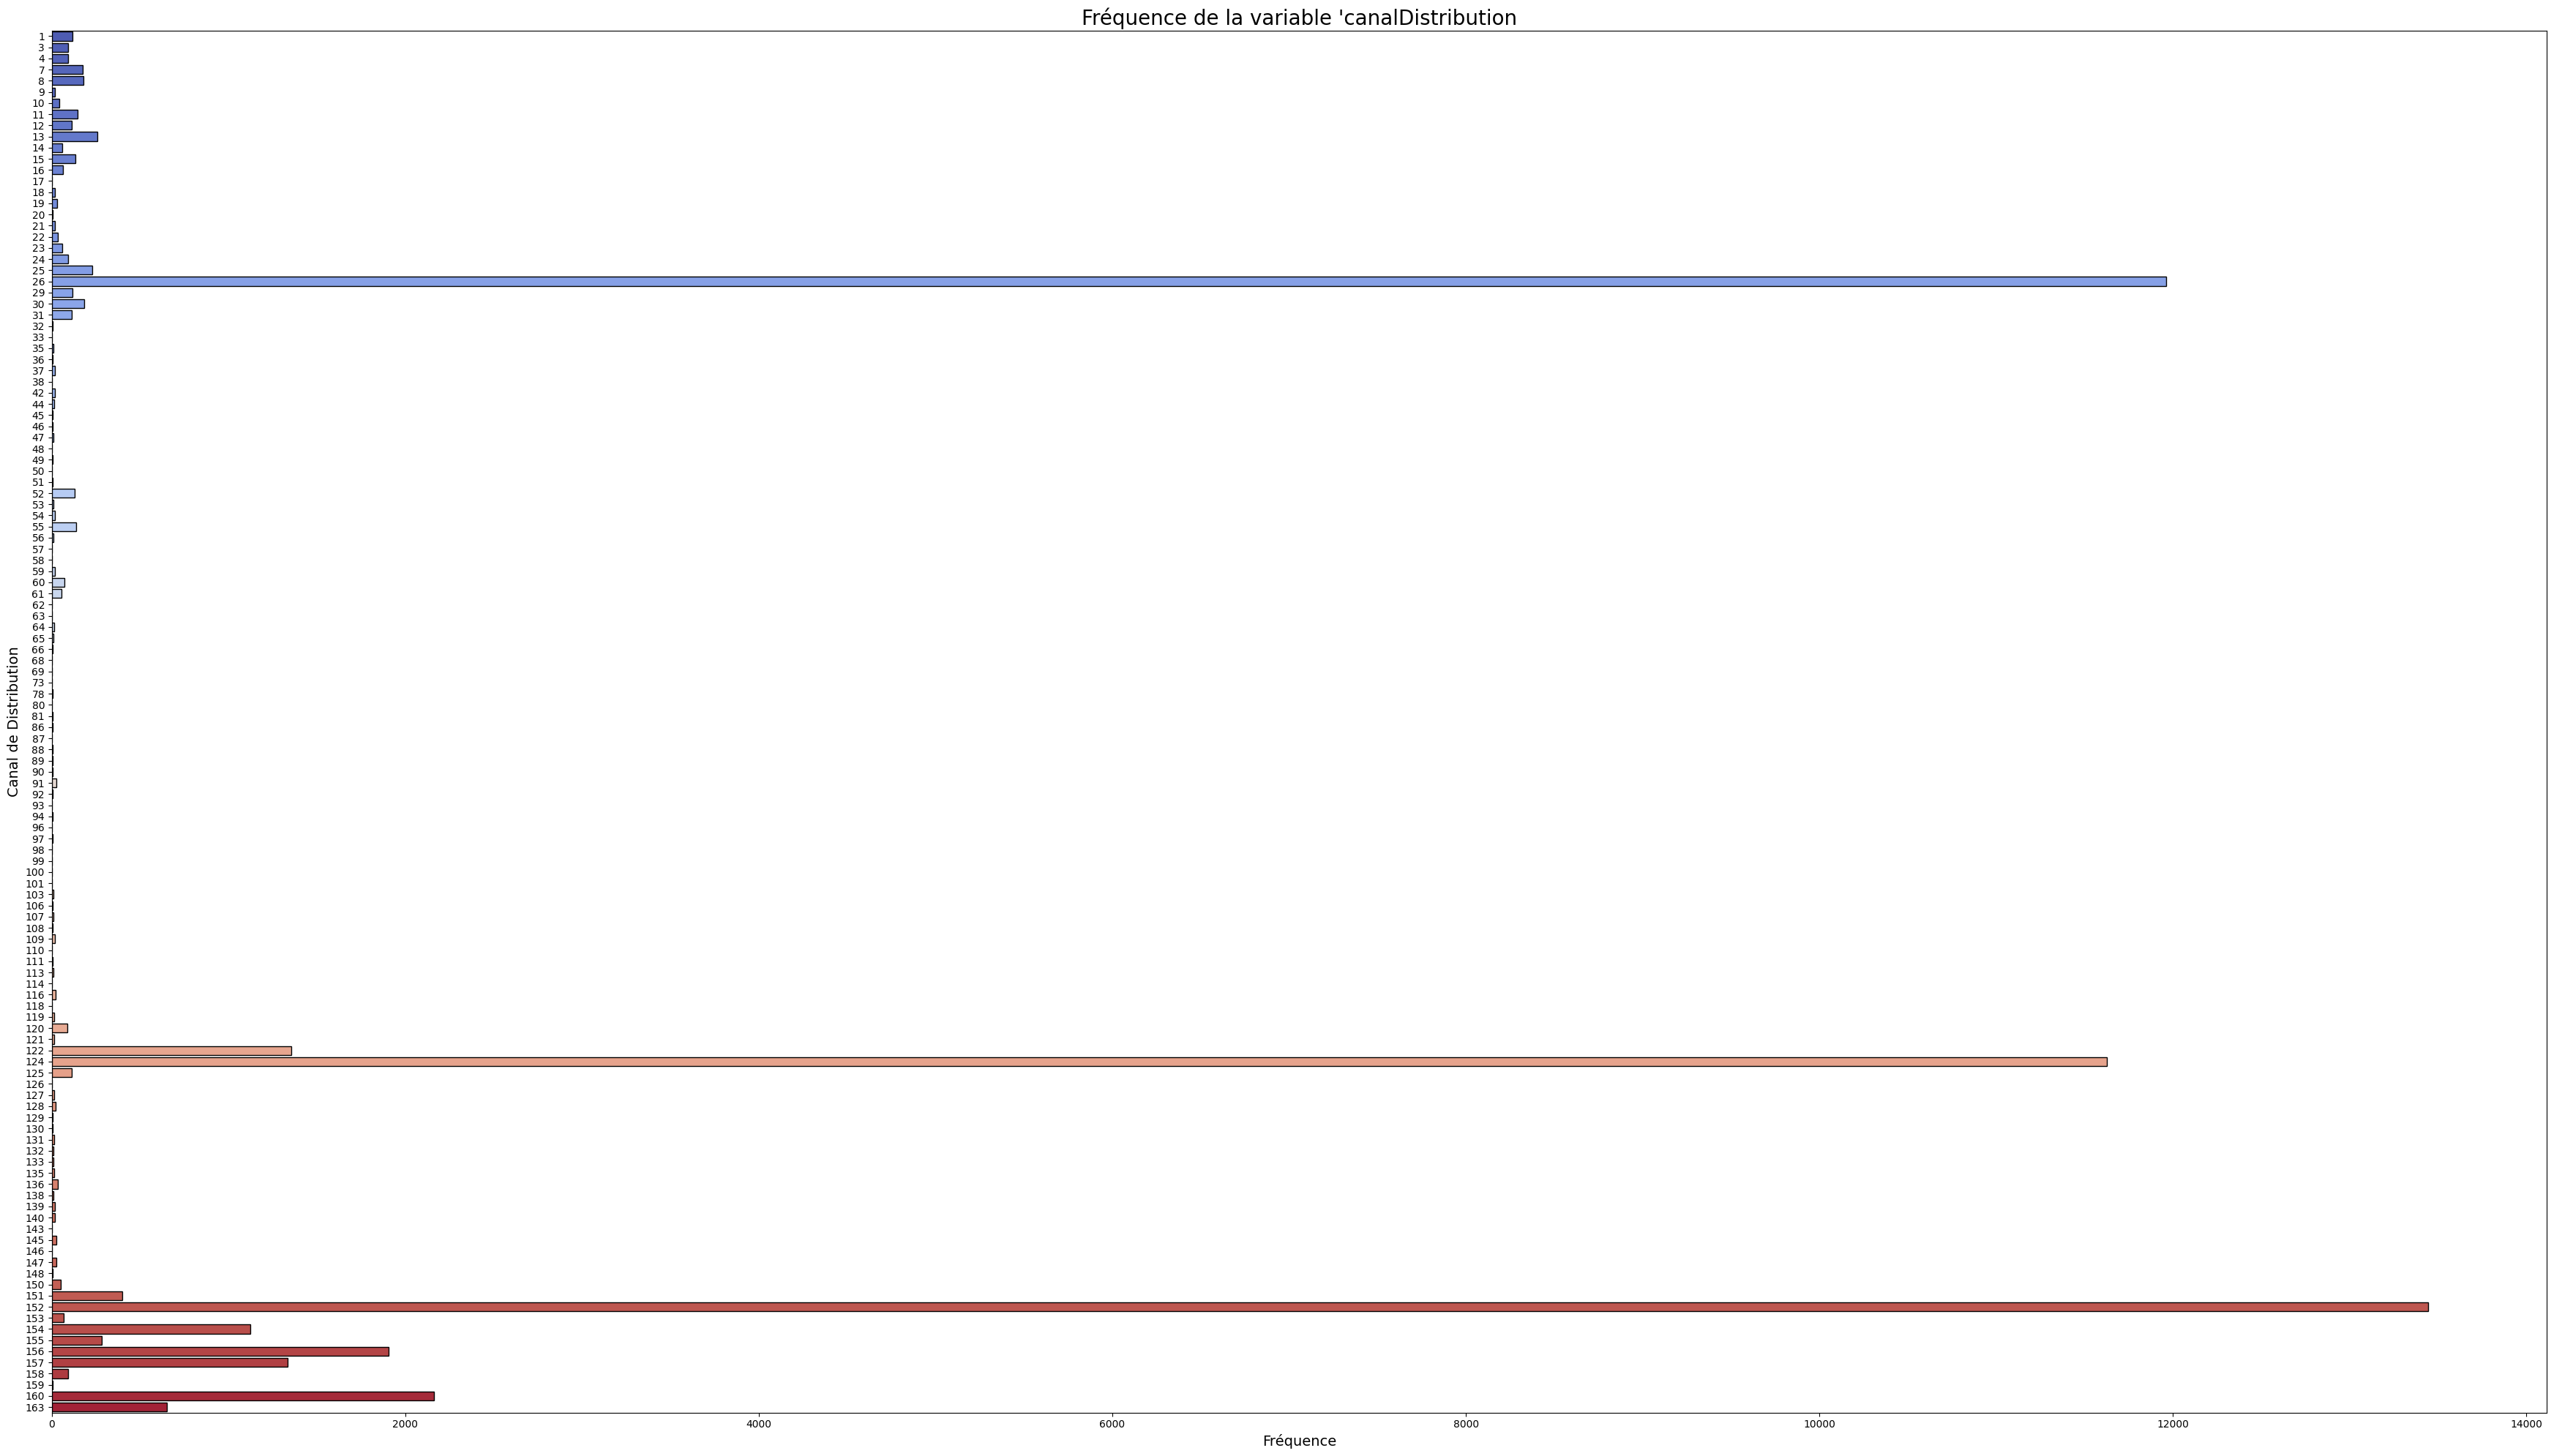

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(35, 20))  # Ajuster la taille de la figure pour une meilleure lisibilité

# Tracer l'histogramme (countplot) inversé de la variable 'canalDistribution'
sns.countplot(data=train_df, y='canalDistribution', palette='coolwarm', edgecolor='black')

# Titre et labels
plt.title("Fréquence de la variable 'canalDistribution", fontsize=20)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Canal de Distribution", fontsize=14)

# Ajuster les espacements pour éviter que des éléments ne soient coupés
plt.tight_layout()

# Afficher le graphique
plt.show()



<ipython-input-14-5a357255fd5e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y='codeRegion', palette='coolwarm', edgecolor='black')


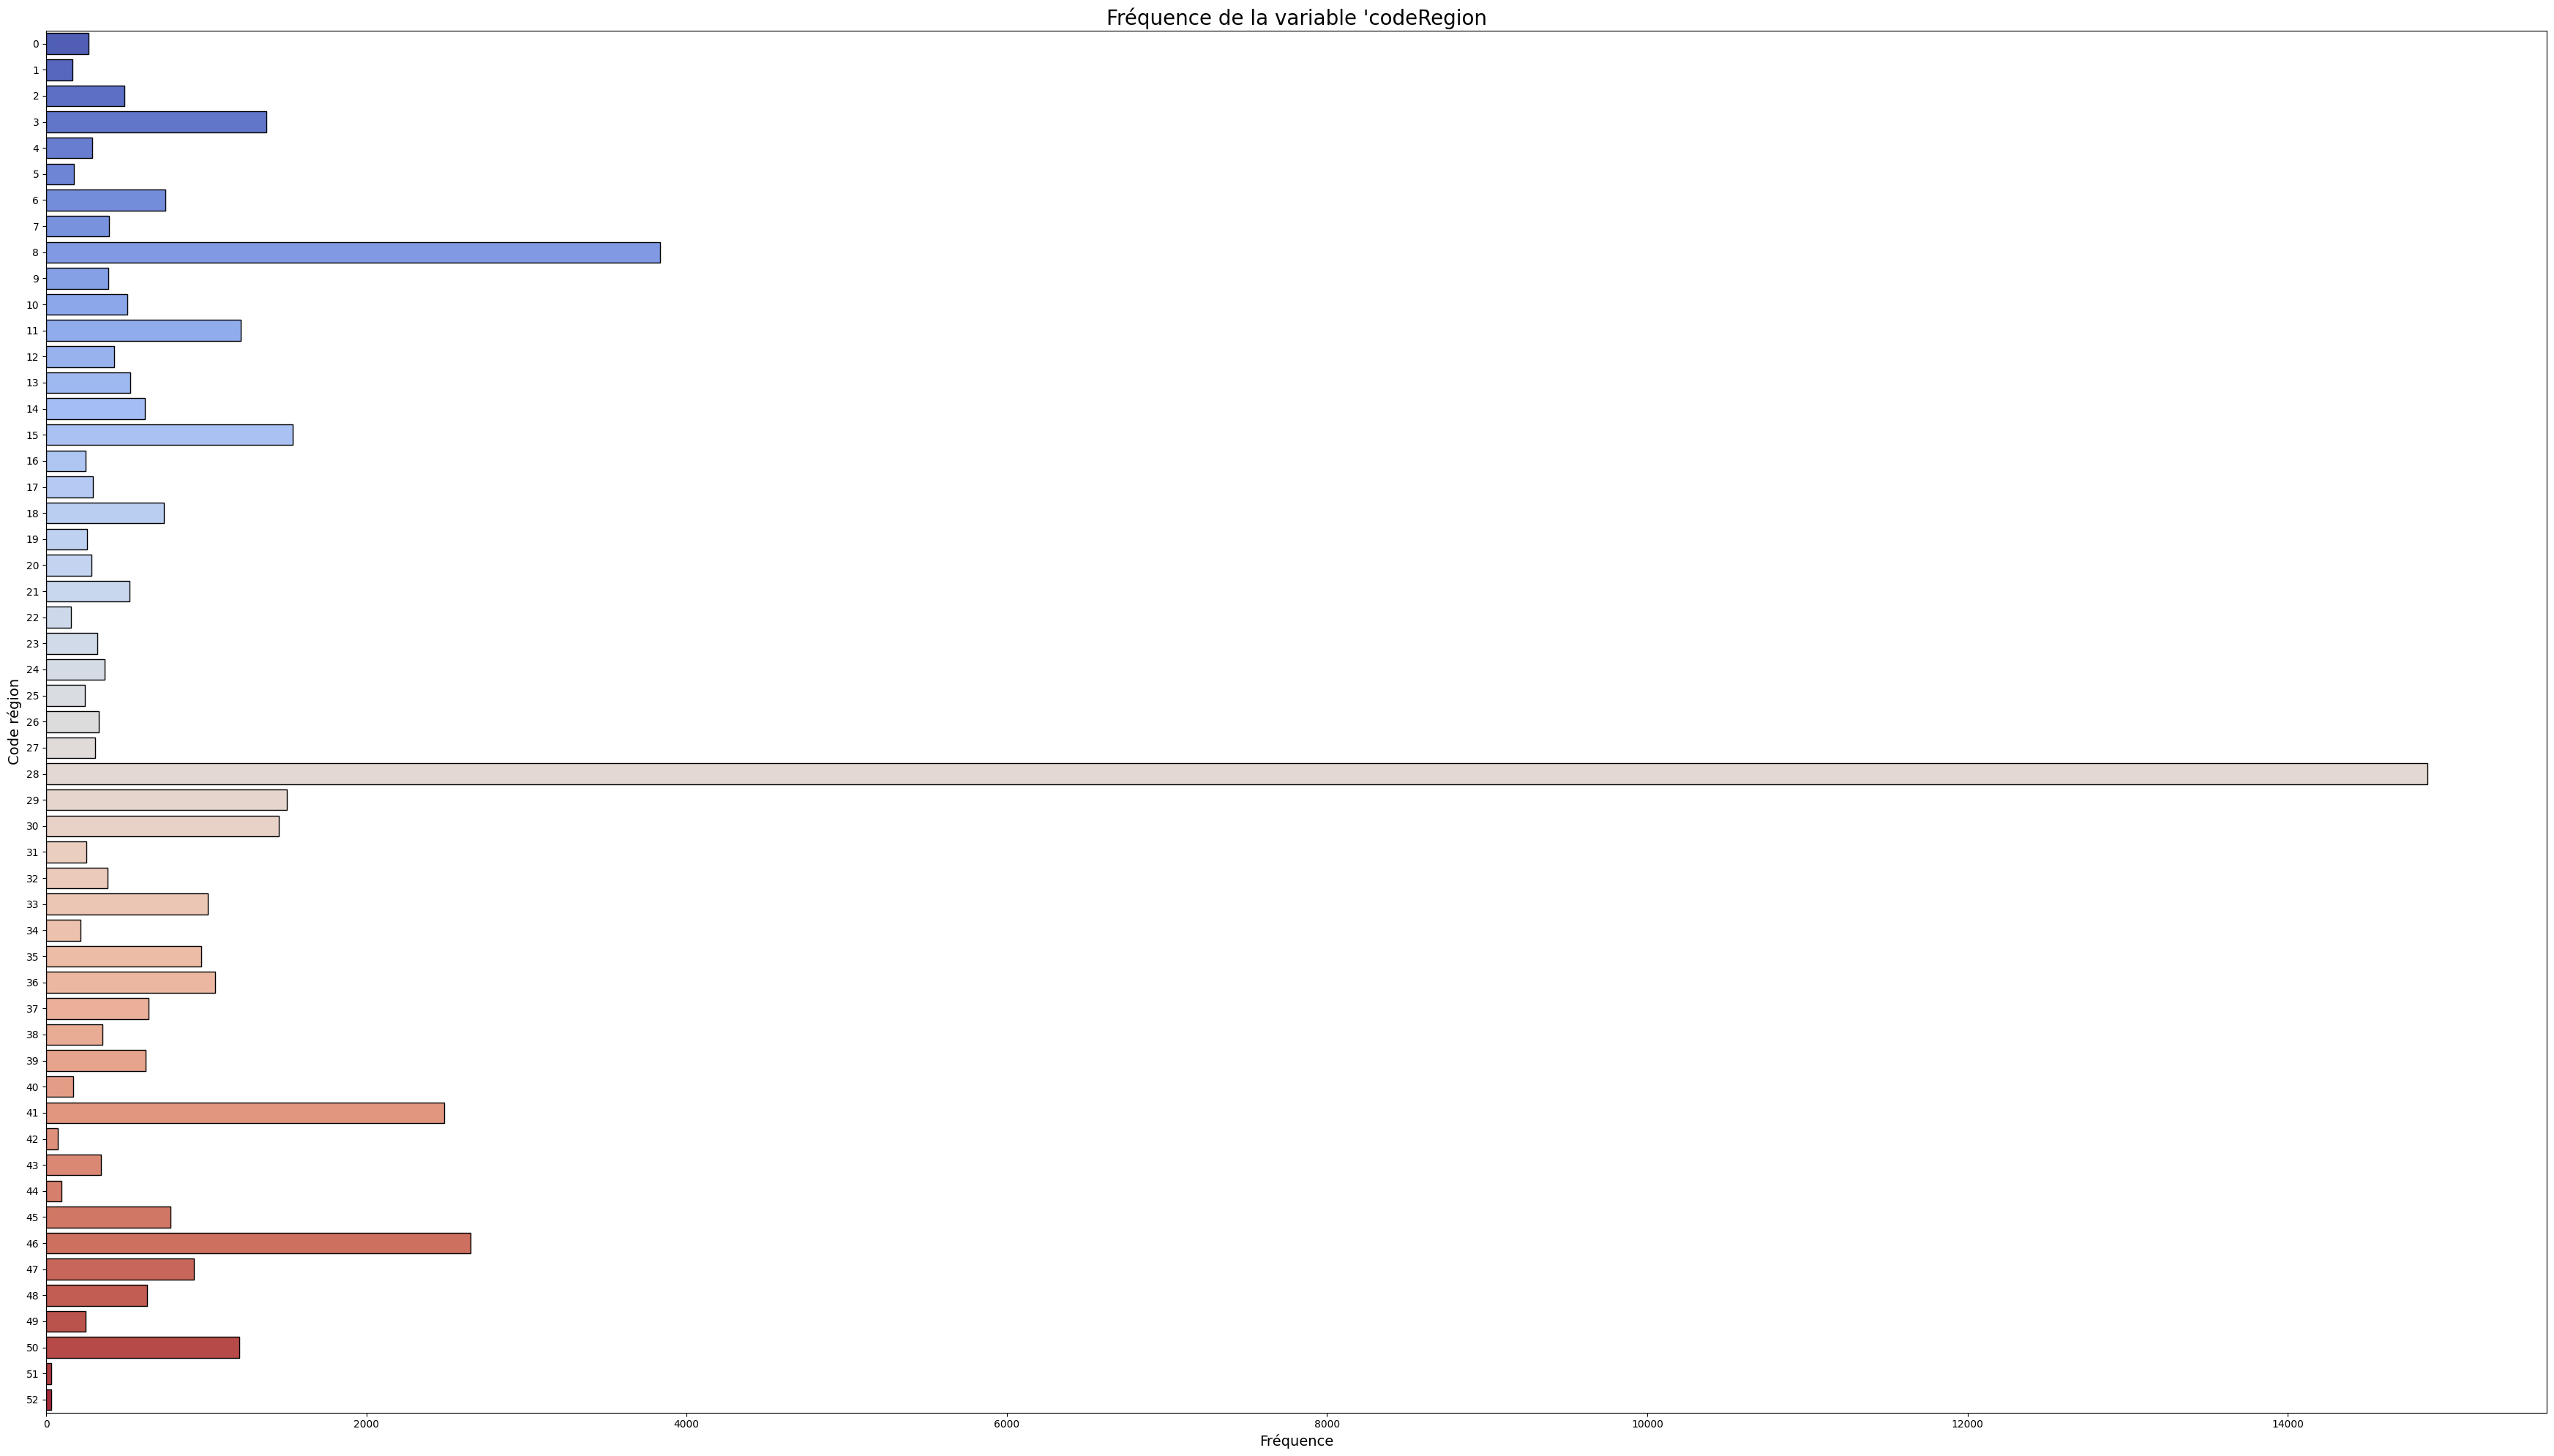

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(35, 20))  # Ajuster la taille de la figure pour une meilleure lisibilité

# Tracer l'histogramme (countplot) inversé de la variable 'canalDistribution'
sns.countplot(data=train_df, y='codeRegion', palette='coolwarm', edgecolor='black')

# Titre et labels
plt.title("Fréquence de la variable 'codeRegion", fontsize=20)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Code région", fontsize=14)

# Ajuster les espacements pour éviter que des éléments ne soient coupés
plt.tight_layout()

# Afficher le graphique
plt.show()



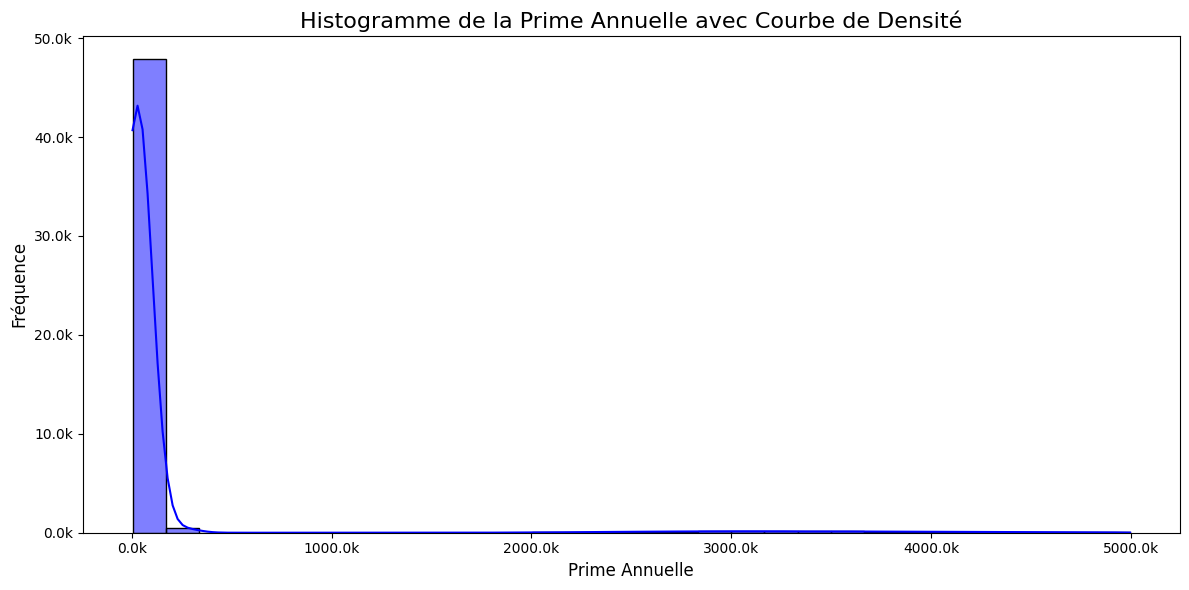

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Définir la taille de la figure pour avoir plus d'espace
plt.figure(figsize=(12, 6))  # Ajuster la taille de la figure

# Tracer l'histogramme de 'primeAnnuelle' avec la courbe de densité (KDE)
sns.histplot(train_df['primeAnnuelle'], kde=True, color='blue', bins=30)

# Ajouter des titres et des labels
plt.title("Histogramme de la Prime Annuelle avec Courbe de Densité", fontsize=16)
plt.xlabel("Prime Annuelle", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Formater les valeurs de l'axe X (primeAnnuelle) et Y (Fréquence) en "k"
def format_axis(val, pos):
    return f'{val/1000:.1f}k'

# Appliquer le formatage pour l'axe X (primeAnnuelle)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_axis))

# Appliquer le formatage pour l'axe Y (Fréquence)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axis))

# Afficher le graphique
plt.tight_layout()
plt.show()



Text(0.5, 0, 'Age')

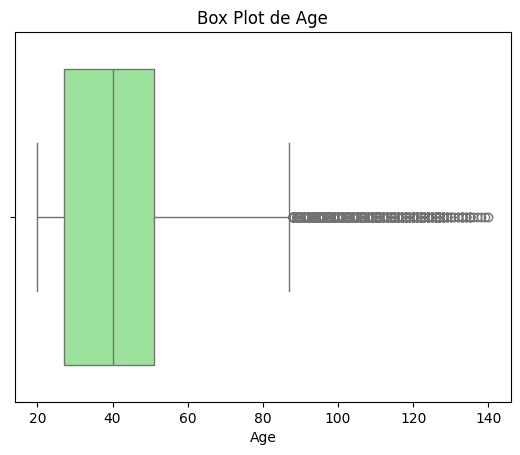

In [ ]:
# Box plot for 'age'

sns.boxplot(data=train_df, x='age', color='lightgreen')
plt.title('Box Plot de Age')
plt.xlabel('Age')



Text(0.5, 0, 'Temps Assuré')

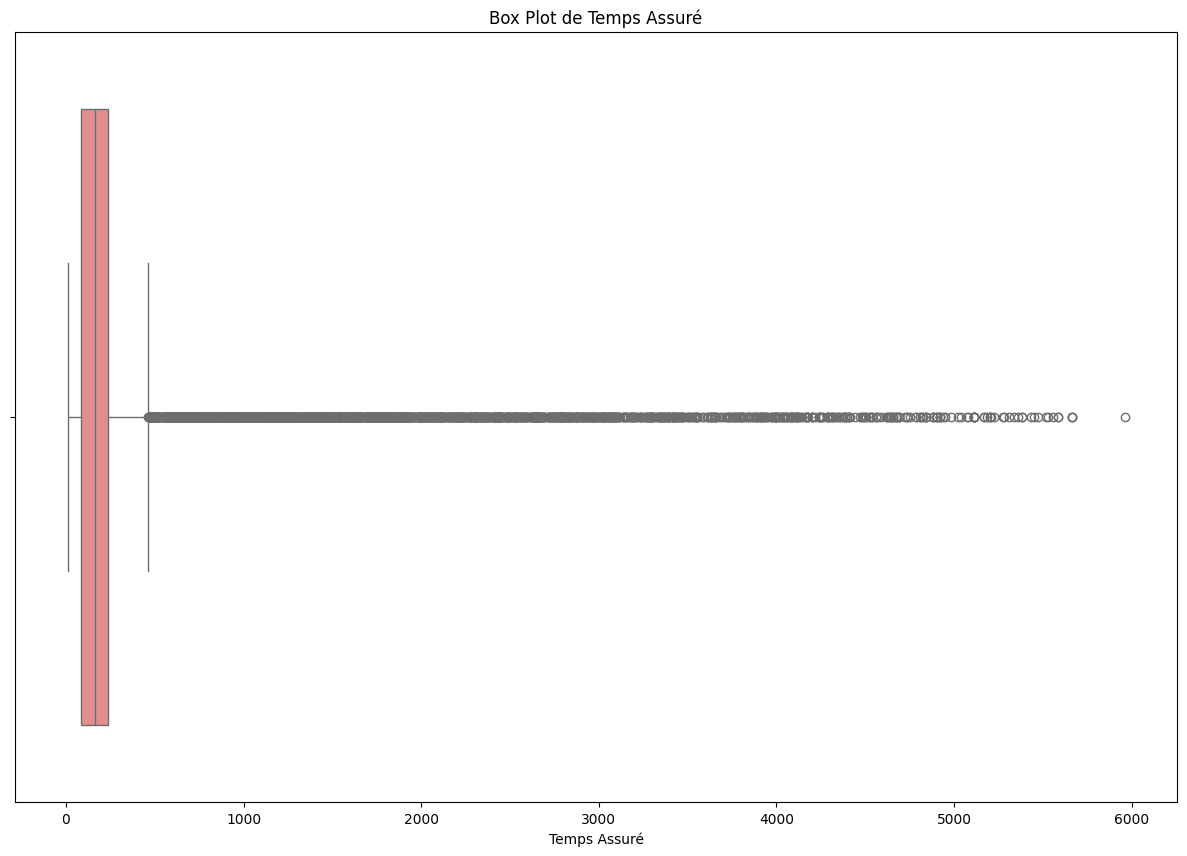

In [ ]:
# Box plot for 'tempsAssure'
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df, x='tempsAssure', color='lightcoral')
plt.title('Box Plot de Temps Assuré')
plt.xlabel('Temps Assuré')
